In [79]:
#import some packages you will be using
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf  
import matplotlib.pyplot as plt 
from scipy import stats
from sklearn import linear_model, metrics

In [80]:
get_ipython().magic(u'matplotlib inline')
 
#set some options for the output
pd.set_option('display.notebook_repr_html', False) 
pd.set_option('display.max_columns', 40) 
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 120)


In [81]:
#read in the datasets
train = pd.read_csv('AMES_TRAIN.csv')
test = pd.read_csv('AMES_TEST_SFAM.csv')
print(train)

      SubClass Zoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0           20     RL          NaN    11838   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1           60     RL         70.0     8304   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
2           45     RM         58.0     6380   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
3           60     RL          NaN    14803   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
4           20     RL         91.0    11375   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
...        ...    ...          ...      ...    ...   ...      ...         ...       ...       ...       ...   
2034        85     RL         75.0    11235   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
2035        20     RL         70.0     9100   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
2

In [82]:
#A good step to take is to convert all variable names to lower case
train.columns = [s.lower() for s in train.columns]
test.columns = [s.lower() for s in test.columns]

In [83]:
#do some exploration of the data
#print('')
#print('----- Summary of Train Data -----')
#train.describe()
#train.sample(5)
#train.info
#train.tail
#train.head
#print('')

#query test
#train.query('lotarea > lotfrontage')
# show the object is a DataFrame
#print('Object type: ', type(train))

# show number of observations in the DataFrame
#print('Number of observations: ', len(train))

# show variable names
#print('Variable names: ', train.columns)

# show descriptive statistics
print(train.describe())

# show a portion of the beginning of the DataFrame
#print(train.head())

#watch your record count and fix records with missing NaN data
#train.shape  
#train.isnull().sum()
#train[train == 0].count()

          subclass  lotfrontage        lotarea  overallqual  overallcond    yearbuilt  yearremodel   masvnrarea  \
count  2039.000000  1714.000000    2039.000000  2039.000000  2039.000000  2039.000000  2039.000000  2024.000000   
mean     56.586562    68.581680   10062.990191     6.077979     5.585091  1970.817558  1984.100539   100.546443   
std      41.876919    23.056608    8125.002560     1.407362     1.107337    30.456005    21.101772   179.386037   
min      20.000000    21.000000    1477.000000     1.000000     1.000000  1872.000000  1950.000000     0.000000   
25%      20.000000    57.000000    7365.000000     5.000000     5.000000  1952.500000  1965.000000     0.000000   
50%      50.000000    67.000000    9320.000000     6.000000     5.000000  1972.000000  1993.000000     0.000000   
75%      70.000000    80.000000   11424.500000     7.000000     6.000000  2000.000000  2004.000000   160.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000  2010.0

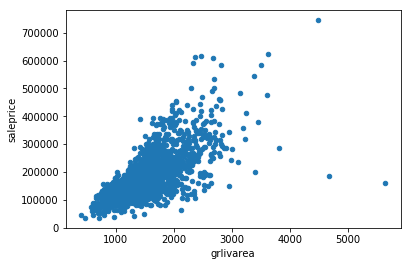

In [84]:
#Some quick plots of the data
#train.hist(figsize=(10,8))
#train.plot(kind= 'box' , subplots=True, layout=(5,9), sharex=False, sharey=False, figsize=(10,8))
train.plot.scatter(y='saleprice', x='grlivarea', s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, 
linewidths=None, verts=None, edgecolors=None )

In [85]:
#Replace NaN values with medians in train data
train=train.replace({'lotfrontage': {np.NaN : 50}})
train.head()

#Replace 0 values with medians in train data
train1=train 
m = np.median(train1.grlivarea[train1.grlivarea>0])
train1=train1.replace({'grlivarea': {0: m}}) 

#Run a simple model
model = smf.ols(formula='saleprice ~ grlivarea' , data=train1).fit()  
  
print (model.summary())
 
#dir(model) lists other print options
#Use the model to score ames_test_sfam
predictions = model.fittedvalues
#print(test)
#print(predictions)

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     1976.
Date:                Thu, 24 Jan 2019   Prob (F-statistic):          2.80e-302
Time:                        02:55:53   Log-Likelihood:                -25195.
No. Observations:                2039   AIC:                         5.039e+04
Df Residuals:                    2037   BIC:                         5.041e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.359e+04   3931.905      3.457      0.0

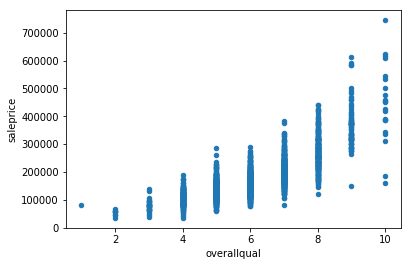

In [86]:
train.plot.scatter(y='saleprice', x='overallqual', s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, 
linewidths=None, verts=None, edgecolors=None )

In [87]:
#Replace 0 values with medians in train data
train2=train 
m = np.median(train2.overallqual[train2.overallqual>0])
train2=train2.replace({'overallqual': {0: m}}) 

#Run a simple model
model_2 = smf.ols(formula='saleprice ~ overallqual' , data=train2).fit()  
  
print (model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     3617.
Date:                Thu, 24 Jan 2019   Prob (F-statistic):               0.00
Time:                        02:55:54   Log-Likelihood:                -24846.
No. Observations:                2039   AIC:                         4.970e+04
Df Residuals:                    2037   BIC:                         4.971e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.346e+04   4656.236    -20.072      

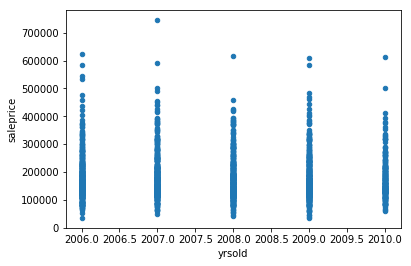

In [88]:
train.plot.scatter(y='saleprice', x='yrsold', s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, 
linewidths=None, verts=None, edgecolors=None )

In [89]:
#Run a simple model
model_3 = smf.ols(formula='saleprice ~ yrsold' , data=train1).fit()  
  
print (model_3.summary())
print (model_3.params)

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.230
Date:                Thu, 24 Jan 2019   Prob (F-statistic):              0.268
Time:                        02:55:54   Log-Likelihood:                -25886.
No. Observations:                2039   AIC:                         5.178e+04
Df Residuals:                    2037   BIC:                         5.179e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.14e+06   2.67e+06      1.176      0.2

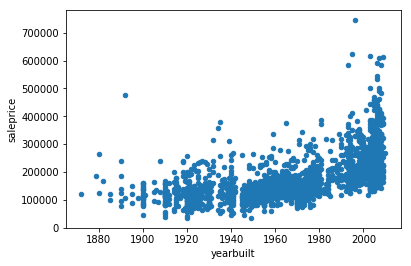

In [90]:
train.plot.scatter(y='saleprice', x='yearbuilt', s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, 
linewidths=None, verts=None, edgecolors=None )

In [91]:
#Run a simple model
model_4 = smf.ols(formula='saleprice ~ yearbuilt' , data=train1).fit()  
  
print (model_4.summary())
print (model_4.params)

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     918.5
Date:                Thu, 24 Jan 2019   Prob (F-statistic):          7.47e-167
Time:                        02:55:55   Log-Likelihood:                -25507.
No. Observations:                2039   AIC:                         5.102e+04
Df Residuals:                    2037   BIC:                         5.103e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.67e+06    9.4e+04    -28.395      0.0

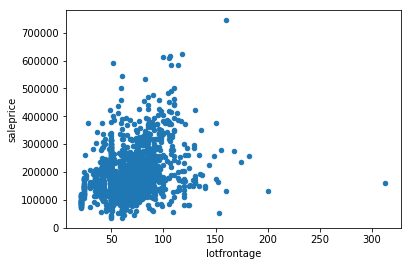

In [92]:
train.plot.scatter(y='saleprice', x='lotfrontage', s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, 
linewidths=None, verts=None, edgecolors=None )

In [93]:
#Replace 0 values with medians in train data
train3=train 
m = np.median(train3.lotfrontage[train3.overallqual>0])
train3=train3.replace({'lotfrontage': {0: m}}) 
#Run a simple model
model_5 = smf.ols(formula='saleprice ~ lotfrontage' , data=train3).fit()  
  
print (model_5.summary())
print (model_5.params)

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     238.4
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           6.07e-51
Time:                        02:55:55   Log-Likelihood:                -25774.
No. Observations:                2039   AIC:                         5.155e+04
Df Residuals:                    2037   BIC:                         5.156e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.038e+05   5165.351     20.100      

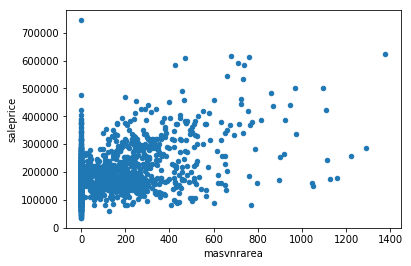

In [94]:
train.plot.scatter(y='saleprice', x='masvnrarea', s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, 
linewidths=None, verts=None, edgecolors=None )

In [95]:
#Replace 0 values with medians in train data
train4=train 
m = np.median(train3.masvnrarea[train4.masvnrarea>0])
train4=train4.replace({'masvnrarea': {0: m}}) 
#Run a simple model
model_6 = smf.ols(formula='saleprice ~ masvnrarea' , data=train4).fit()  
  
print (model_6.summary())
print (model_6.params)

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     381.2
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           6.53e-78
Time:                        02:55:56   Log-Likelihood:                -25523.
No. Observations:                2024   AIC:                         5.105e+04
Df Residuals:                    2022   BIC:                         5.106e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.252e+05   3197.235     39.165      0.0

In [96]:
newtrain = train
newtrain['sfqual'] = newtrain['grlivarea']/newtrain['overallqual']
newtrain['pricesf'] = newtrain['saleprice']/newtrain['grlivarea']

In [97]:
newtrain.describe

<bound method NDFrame.describe of       subclass zoning  lotfrontage  lotarea street alley lotshape landcontour utilities lotconfig landslope  \
0           20     RL         50.0    11838   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1           60     RL         70.0     8304   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
2           45     RM         58.0     6380   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
3           60     RL         50.0    14803   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
4           20     RL         91.0    11375   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
...        ...    ...          ...      ...    ...   ...      ...         ...       ...       ...       ...   
2034        85     RL         75.0    11235   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
2035        20     RL         70.0     9100   Pave   NaN      Reg         Lvl 

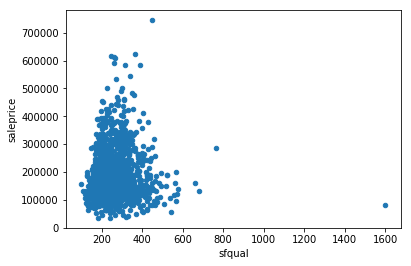

In [98]:
newtrain.plot.scatter(y='saleprice', x='sfqual', s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, 
linewidths=None, verts=None, edgecolors=None )

In [99]:
#Run a simple model
model_7 = smf.ols(formula='saleprice ~ sfqual' , data=newtrain).fit()  
  
print (model_7.summary())
print (model_7.params)

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     22.59
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           2.15e-06
Time:                        02:55:57   Log-Likelihood:                -25875.
No. Observations:                2039   AIC:                         5.175e+04
Df Residuals:                    2037   BIC:                         5.177e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.528e+05   5848.005     26.134      0.0

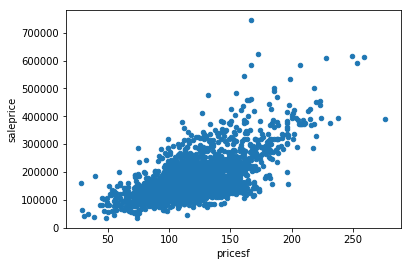

In [100]:
newtrain.plot.scatter(y='saleprice', x='pricesf', s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, 
linewidths=None, verts=None, edgecolors=None )


In [101]:
#Run a simple model
model_8 = smf.ols(formula='saleprice ~ pricesf' , data=newtrain).fit()  
  
print (model_8.summary())
print (model_8.params)


                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     1274.
Date:                Thu, 24 Jan 2019   Prob (F-statistic):          3.52e-217
Time:                        02:55:57   Log-Likelihood:                -25391.
No. Observations:                2039   AIC:                         5.079e+04
Df Residuals:                    2037   BIC:                         5.080e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6039.9572   5372.169     -1.124      0.2

In [102]:
newtrain_2 = train
newtrain_2['totalsf'] = (newtrain_2['totalbsmtsf']+newtrain_2['grlivarea']+newtrain_2['garagearea'])
newtrain_2.describe
newtest_2 = test
newtest_2['totalsf'] = (newtest_2['totalbsmtsf']+newtest_2['grlivarea']+newtest_2['garagearea'])

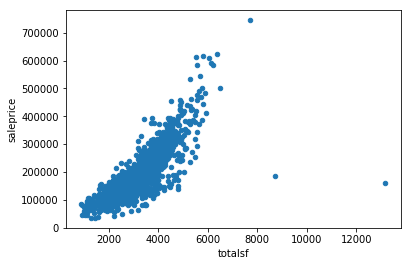

In [103]:
newtrain_2.plot.scatter(y='saleprice', x='totalsf', s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, 
linewidths=None, verts=None, edgecolors=None )

In [104]:
#Run a simple model
model_9 = smf.ols(formula='saleprice ~ totalsf' , data=newtrain_2).fit()  
  
print (model_9.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     4164.
Date:                Thu, 24 Jan 2019   Prob (F-statistic):               0.00
Time:                        02:55:58   Log-Likelihood:                -24739.
No. Observations:                2038   AIC:                         4.948e+04
Df Residuals:                    2036   BIC:                         4.949e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.88e+04   3378.915     -8.525      0.0

In [105]:
#Convert the array predictions to a data frame then merge with the index for the test data to create your file
test_predictions = model.predict(test)
print(test_predictions)
d = {'p_saleprice': test_predictions}
df1 = test[['index']]
df2=pd.DataFrame(data=d)
your_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
print(your_file)
#Submit your file as csv using the following code to save on your computer
#You will have to delete the first column in the csv file to submit to kaggle 
your_file.to_csv('LoganStrouse_predictions_model_1.csv') 

0       94959.449424
1      218518.097190
2      220192.333610
3      182354.590527
4      160477.901311
           ...      
721    197087.871019
722    321427.829114
723    143512.305593
724    201329.269949
725    171639.477442
Length: 726, dtype: float64
     index    p_saleprice
0        1   94959.449424
1        4  218518.097190
2        7  220192.333610
3       11  182354.590527
4       13  160477.901311
..     ...            ...
721   2912  197087.871019
722   2914  321427.829114
723   2919  143512.305593
724   2923  201329.269949
725   2924  171639.477442

[726 rows x 2 columns]


In [106]:
#Convert the array predictions to a data frame then merge with the index for the test data to create your file
test_predictions_2 = model_2.predict(test)
print(test_predictions_2)
d_2 = {'p_saleprice': test_predictions_2}
df3 = test[['index']]
df4 = pd.DataFrame(data=d_2)
your_file_2 = pd.concat([df3,df4],axis = 1, join_axes=[df3.index])
print(your_file)
#Submit your file as csv using the following code to save on your computer
#You will have to delete the first column in the csv file to submit to kaggle 
your_file_2.to_csv('LoganStrouse_predictions_model_2.csv') 

0       41204.818391
1      265644.282461
2      175868.496833
3      265644.282461
4      220756.389647
           ...      
721    220756.389647
722    310532.175275
723    220756.389647
724    220756.389647
725    130980.604019
Length: 726, dtype: float64
     index    p_saleprice
0        1   94959.449424
1        4  218518.097190
2        7  220192.333610
3       11  182354.590527
4       13  160477.901311
..     ...            ...
721   2912  197087.871019
722   2914  321427.829114
723   2919  143512.305593
724   2923  201329.269949
725   2924  171639.477442

[726 rows x 2 columns]


In [107]:
#Convert the array predictions to a data frame then merge with the index for the test data to create your file
test_predictions_3 = model_9.predict(newtest_2)
print(test_predictions_3)
d_2 = {'p_saleprice': test_predictions_3}
df3 = test[['index']]
df4 = pd.DataFrame(data=d_2)
your_file_3 = pd.concat([df3,df4],axis = 1, join_axes=[df3.index])
print(your_file_3)
#Submit your file as csv using the following code to save on your computer
#You will have to delete the first column in the csv file to submit to kaggle 
your_file_3.to_csv('LoganStrouse_predictions_model_3.csv') 

0       21829.585716
1      262151.686604
2      187415.680663
3      239925.365135
4      184567.933225
           ...      
721    230340.264001
722    337651.722346
723    169565.166233
724    215406.954264
725    166231.218013
Length: 726, dtype: float64
     index    p_saleprice
0        1   21829.585716
1        4  262151.686604
2        7  187415.680663
3       11  239925.365135
4       13  184567.933225
..     ...            ...
721   2912  230340.264001
722   2914  337651.722346
723   2919  169565.166233
724   2923  215406.954264
725   2924  166231.218013

[726 rows x 2 columns]
